# 5 – Data Analysis and Visualization

* * * 

### Icons used in this notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>
💭 **Reflection**: Helping you think about programming.<br>
⚠️ **Warning**: Heads-up about tricky stuff or common mistakes.<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br>

### Learning Objectives
1. [Coding Strategies](#strat)
2. [Exploring Data with Pandas](#pandas)
3. [Visualizing DataFrames](#vis)

<a id='strat'></a>

# Coding Strategies

First off, let's discuss five best practices for coding.

### 💡 1: Use comments

To help explain your code, you can include **comments** to explain what is going on. Use comments to explain *why* you are using blocks of code and *how* code works. 

🔔 **Question**: Some code is commented below. What is helpful about the comments? What could be improved?

In [ ]:
import numpy as np

#list of proportions
proportion_list = [.96821,.78998,.86898,.98981298]

for prop in proportion_list:
    
    percent = prop * 100 #multiply by 100
    percent = round(percent,1)
    print(percent,'%')



### 💡 2: Keep lines short
Another principle of good Python coding is to keep lines short enough that you don't need to scroll. This is true of both code and comments!

You can use **implied line continuation** inside parentheses, most commonly by including line breaks at commas.

In [ ]:
a_long_list = ['bannana','apple','pineapple',
               'mango','strawberry','guava',
               'lychee','peach']

### 💡 3: Pythonic Coding

**Pythonic coding** means taking advantage of the design of Python to make more readable code. 

🔔 **Question**: The following two approaches are equivalent. What is happening? Which do you find easier to read?

In [ ]:
s = 'sample.thing'

# First approach
slist = s.split('.')
first_word = slist[0]
first_letter = first_word[0]
first_upper = first_letter.upper()

# Second approach
second_upper = s.split('.')[0][0].upper()

# Check that they are identical 
#print(first_upper, second_upper)

Generally, the second approach is preferred, when possible. 

- It uses less lines of code.
- It avoids needing to track and remember many variable names.
- It is highly readable if you are familiar with Python.

However, disadvantages of the second approach are:

- It can be harder to follow the steps.
- It's harder to debug.

One approach is to write out chunks of code the first way when debugging, then condensing them into fewer lines once the debugging is complete.

### 💡 4: Use Naming Conventions

"The best programmer is the one who can come up with the best names"

* Good names replace comments and make code self-documenting.
* variables, functions, files, etc. should consist of complete words. Try to avoid abbreviations.
* Use this principle in your coding: frequent -> short, infrequent -> long.

In [ ]:
# less ideal
a = 1
a = 'a string'
def a():
    pass  # Do something

# more ideal
count = 1
msg = 'a string'
def func():
    pass  # Do something

Even without comments, good names give a good idea of what is going on in your code!

Here are some more style guidelines:

* joined_lower for functions, methods, attributes.
* joined_lower or ALL_CAPS for constants.
* StudlyCaps for classes.
* camelCase only to conform to pre-existing conventions.

Most often you will use the `joined_lower` format for your variables.

### 💡 5: Plan ahead
Planning ahead can help mitigate time spent dealing with bugs and errors in code. General steps for defensive coding are:

1. State the goals of your code as clearly as possible.
2. Plan out the general logic of steps needed to achieve the goal.
3. Translate the steps into code:
    1. Build up steps piece by piece.
    2. Test frequently to make sure code is working as expected and handle bugs as quickly as possible.
4. Check the output.

## 🥊 Challenge: Make a Function

Say you need to write a function that takes in a list of textual data. We've defined a list for you here.

In [60]:
sent_list = ['When I wake up, the other side of the bed is cold.', 
             'My fingers stretch out, seeking Prim’s warmth but finding only the rough canvas cover of the mattress.',
             'She must have had bad dreams and climbed in with our mother.']

Your function is supposed to loop through this list, and for each item, split the words on whitespace, lowercase all items in the list, and returns each word. 
**Use the five strategies defined above** to write your code!

1. Use comments to indicate what your code is doing.
2. Use short lines.
3. Make use of Pythonic coding when splitting and lowercasing.
4. Use the common naming conventions we define above.
5. Write down the steps you need to take in the text cell below.



*YOUR TEXT HERE*





In [ ]:
# YOUR CODE HERE


<a id="pandas"></a>
# Exploring Data with Pandas

We introduced `pandas` in Fundamentals I. It is the most common package used in data analysis, with a focus on data manipulation and processing. We will work some more with `pandas` here, and work towards visualizing our data.

In [1]:
# recall that pandas is frequently imported with the alias pd
import pandas as pd
import numpy as np

We'll use data from the [California Health Interview Survey (CHIS)](https://healthpolicy.ucla.edu/chis/Pages/default.aspx), the nation's largest state health survey. 

The data has the following columns: 

- number_sodas: Number of times drank soda per week
- poverty_line: Poverty Level as Times of 100% Federal Poverty Line (FPL)
- health: General Health Assessment
- race_eth: Self-Reported Race Ethnicity
- feel_safe: Feeling Safe in the Neighborhood
- tenure: Self-Reported Household Tenure
- earnings: Earnings Last Month Before Taxes and Deductions
- hh_income: Household’s Total Annual Income

🔔 **Question**: How many rows are in the data set?

In [14]:
df = pd.read_csv('../../../data/gapminder-FiveYearData.csv')
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


## DataFrame Methods

Just like other objects, `DataFrames` have a series of methods that are associated with them. There are many methods for summarizing `pd.DataFrames`. For example [`df.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) will give some summary statistics for a column. Let's look at how `.describe()` works on the `penguins` DataFrame.


🔔 **Question**: Why are only some of the columns in the DataFrame visible in the output below?

In [15]:
df.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


This function is good for summarizing numerical data in a dataset. However, sometimes this might not be enough. For example, what if we wanted the median of the penguin mass rather than the mean? 

First, let's select just one column to operate on. We can select an individual column with bracket notation. This is analogous to indexing a list.

🔔 **Question**: What is the type of the output?

In [18]:
df['lifeExp']

0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
         ...  
1699    62.351
1700    60.377
1701    46.809
1702    39.989
1703    43.487
Name: lifeExp, Length: 1704, dtype: float64

A single column of pandas is a `Series` object. This can be treated as a list or other iterable, and allows for you to do calculations over it. 

We can then look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) to see the methods and attributes that are available for `Series` objects. If we want the median, we can use the `.median()` function.

In [19]:
df['lifeExp'].median()

60.7125

We can also do operations on a column. 

🔔 **Question**: What will happen in the code below? What is the type/shape of the output?

In [21]:
# What are we doing here?
df['gdpPercap'] * df['pop']

0       6.567086e+09
1       7.585449e+09
2       8.758856e+09
3       9.648014e+09
4       9.678553e+09
            ...     
1699    6.508241e+09
1700    7.422612e+09
1701    9.037851e+09
1702    8.015111e+09
1703    5.782658e+09
Length: 1704, dtype: float64

This is called a **vectorized operation:** where the operation is applied to each element of the column. This allows you to efficiently apply operations to every item of the Series.

## 🥊 Challenge: Methods

For each of the following methods, answer the following questions:
1. Is the method operating on a `DataFrame` or a `Series` object?
2. What type is the output for all these methods?

In [22]:
# Counting values
df['lifeExp'].value_counts(ascending=True)

28.801    1
70.836    1
68.426    1
65.843    1
62.008    1
         ..
73.680    3
76.420    3
78.770    3
66.800    3
69.390    4
Name: lifeExp, Length: 1626, dtype: int64

In [ ]:
# Retrieve unique values
df['continent'].unique()

In [23]:
# Detect missing values
df.isnull()

,country,year,pop,continent,lifeExp,gdpPercap
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1699,False,False,False,False,False,False
1700,False,False,False,False,False,False
1701,False,False,False,False,False,False
1702,False,False,False,False,False,False


In [24]:
# Remove missing values
df.dropna()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623


In [31]:
# Operate on string values
df['country'].str[:4]

0       Afgh
1       Afgh
2       Afgh
3       Afgh
4       Afgh
        ... 
1699    Zimb
1700    Zimb
1701    Zimb
1702    Zimb
1703    Zimb
Name: country, Length: 1704, dtype: object

There are easily several hundred methods asociated with `DataFrames` and `Series`. It is impractical to try to memorize all of them. Often, it's more productive to develop (1) an understanding of what is possible with Python and (2) the ability to learn how to implement new functions by reading documentation and examples!

## 🥊 Challenge: Categorical -> Numeric data

Recall that in our dataset, we have a 'continent' column that includes the values 'Asia', 'Europe', 'Africa', 'Americas', and 'Oceania'. Let's say that for a model, we want to replace these string values with numbers that will serve as input to the model. There are several ways to do this. Look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) and see if you can `replace` the strings with a corresponding number.

In [51]:
#YOUR CODE HERE
df.continent.replace(df['continent'].unique(), [1,2,3,4,5])


0       1
1       1
2       1
3       1
4       1
       ..
1699    3
1700    3
1701    3
1702    3
1703    3
Name: continent, Length: 1704, dtype: int64

## Selecting Columns and Rows

We can use `.loc[row, column]` to index columns and rows in the DataFrame. 

We can use a **Boolean mask** (discussed in the previous notebook) to represent which rows to select. A Boolean mask is an operation that takes as input a series and a condition, and outputs a series with `True` where that condition is met and `False` elsewhere.

For example, let's say that we want to measure countries where the life expectancy is under 40.


In [42]:
df['lifeExp'] < 40

0        True
1        True
2        True
3        True
4        True
        ...  
1699    False
1700    False
1701    False
1702     True
1703    False
Name: lifeExp, Length: 1704, dtype: bool

Then to get the subset of the entire `penguins` object, we can pass this Boolean mask to `.loc[]`:

In [43]:
df.loc[df['lifeExp'] < 40]

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106
...,...,...,...,...,...,...
1670,Yemen Rep.,1962,6120081.0,Asia,35.180,825.623201
1671,Yemen Rep.,1967,6740785.0,Asia,36.984,862.442146
1672,Yemen Rep.,1972,7407075.0,Asia,39.848,1265.047031
1690,Zambia,2002,10595811.0,Africa,39.193,1071.613938


Now, if you wish to subset this DataFrame for columns as well as rows, you can include a columns argument in `.loc[]` that includes a list of columns to subset. 

💡 **Tip**: Note the comma that's separating between the rows and columns we're subsetting!

In [44]:
# Subsetting rows and columns
df.loc[df['lifeExp'] < 40, ['country','year','lifeExp']]

,country,year,lifeExp
0,Afghanistan,1952,28.801
1,Afghanistan,1957,30.332
2,Afghanistan,1962,31.997
3,Afghanistan,1967,34.020
4,Afghanistan,1972,36.088
...,...,...,...
1670,Yemen Rep.,1962,35.180
1671,Yemen Rep.,1967,36.984
1672,Yemen Rep.,1972,39.848
1690,Zambia,2002,39.193


## 🥊 Challenge: Subsetting a DataFrame

1. Modify the `.loc[]` expression above to subset for GDP per capita under 800. Save it to the variable `low_gdp`.
2. Calculate the mean life expectancy for this group (**Hint**: use `.mean()`).

In [50]:
##your code here
low_gdp = df.loc[df['gdpPercap'] < 800]
low_gdp['lifeExp'].mean()

44.60282245901637

<a id="vis"></a>
# Visualizing DataFrames

We often want to look at our data visually. Fortunately, `pandas` also offers some basic plotting functions that can be useful in exploring a data set. In this section, we will cover two basic types of plots: histograms and scatter plots. See the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for further information on plotting and plot customization.

### Histograms

A histogram shows the distribution of a variable using binned values. We can call this using the syntax: `df[column].plot(kind='hist')`.

💡 **Tip**: Use a histogram if you want to show distributions of continuous variables.

Plot A: 5 Bins


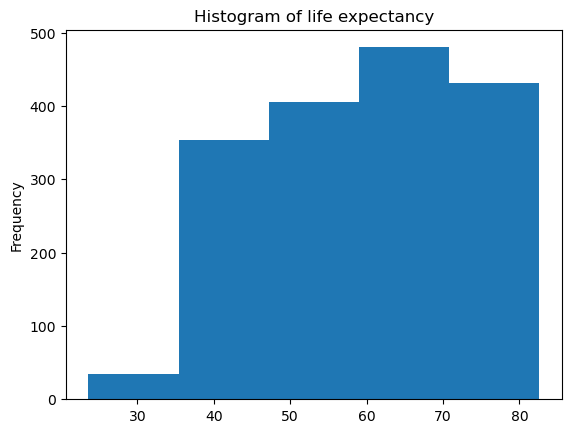

In [52]:
print('Plot A: 5 Bins')
fig = df['lifeExp'].plot(kind='hist', title='Histogram of life expectancy', bins=5)

Note the `bins` keyword argument when calling the histogram. It changes the number of "bins" or "buckets" in the histogram. Each bin is plotted as a bar whose height corresponds to how many data points are in that bin.

🔔 **Question**: Let's plot two more histograms with different amounts of bins. Which of the 3 plots would you pick, and why?

Plot B: 10 Bins


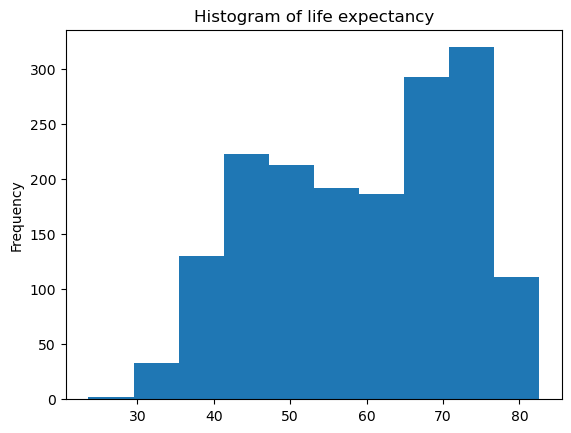

In [53]:
print('Plot B: 10 Bins')
fig = df['lifeExp'].plot(kind='hist', title='Histogram of life expectancy', bins=10)

Plot C: 20 bins


<AxesSubplot:title={'center':'Histogram of life expectancy'}, ylabel='Frequency'>

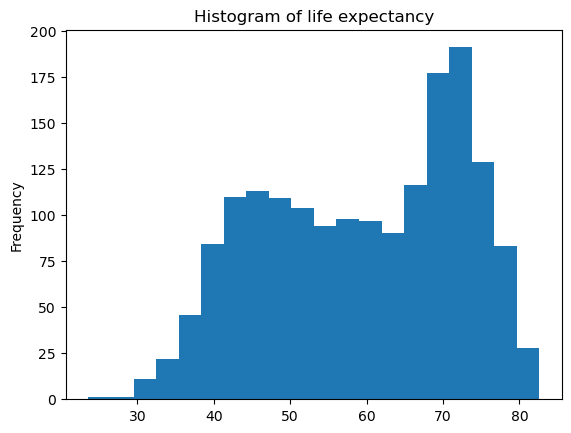

In [55]:
print('Plot C: 20 bins')
df['lifeExp'].plot(kind='hist', title='Histogram of life expectancy', bins=20)

### Bar Plots

Bar plots show the relationship between a numeric and a categoric variable. Here, we use the "country"  (categorical) and "lifeExp" (numeric) columns.

💡 **Tip**: Use a bar plot when you want to illustrate differences in frequencies of some category.

Let's retrieve the 10 data points with the lowest life expectancy in our data using `.sort_values()`, and then plot those data points in a bar plot.


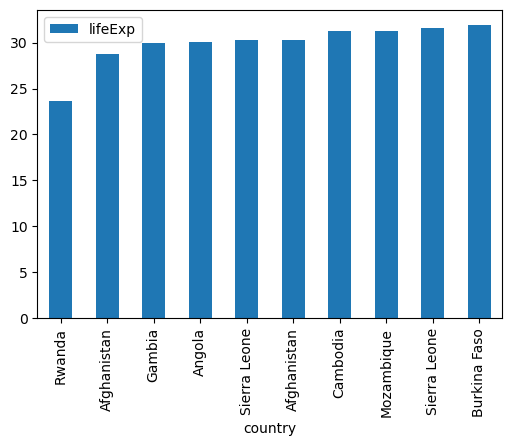

In [74]:
# Sort values based on low life expectancy, get top-10 
low_lifeExp = df.sort_values('lifeExp',ascending=True)[:10]

# Plot
low_lifeExp.plot.bar(x = 'country', y = 'lifeExp', figsize = (6,4));


### Scatter Plots

Scatter plots visualize the relationship between different variables. We can create a scatter plot by specifying the columns to use for the `x` and `y` axes. Notice that instead of calling it on a single column of data, we are using `df.plot(kind='scatter')`.

💡 **Tip**: Use scatter plots when you have two variables that pair well together.

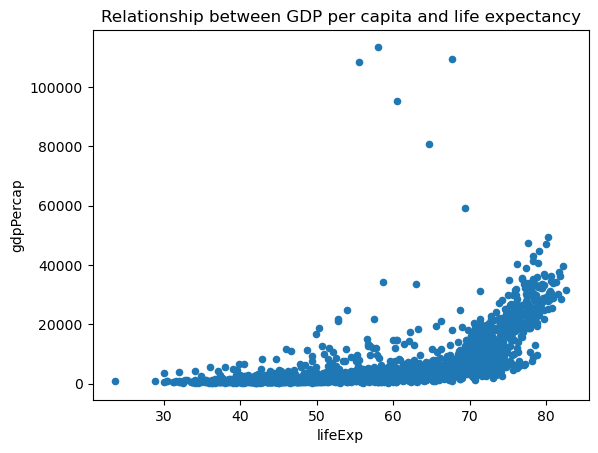

In [57]:
fig = df.plot(kind='scatter',
              x='lifeExp',
              y='gdpPercap',
              title='Relationship between GDP per capita and life expectancy')

🔔 **Question**: Do you notice any pattern in the data? What might be causing that pattern?

## Plotting with `matplotlib` and `seaborn`

So far, we've built plots directly from Pandas DataFrames. On the back end, Pandas uses Matplotlib, a very popular visualization library in Python, in order to do this. But we can also use Matplotlib directly.

### Creating a boxplot

A boxplot (or "box and whiskers" plot) displays the distribution and skewness of numerical data by displaying the data quartiles (or percentiles) and averages. This includes the minimum, first quartile, median, third quartile, and maximum. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

💡 **Tip**: Use a boxplot when you want to illustrate variation in a single float or integer, and to identify outliers.

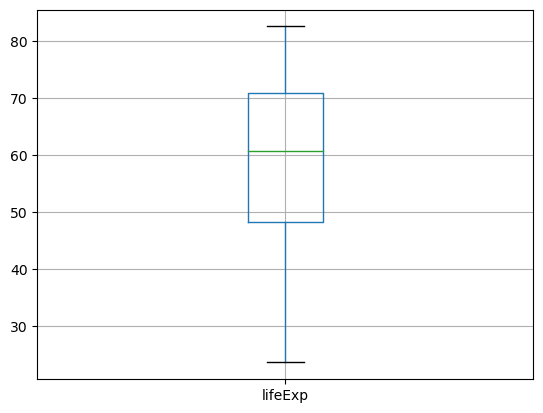

In [58]:
import matplotlib.pyplot as plt

df.boxplot(column=['lifeExp']);

The led line above is the median value in the data; the bottom and top of the box are the first and third quartiles.

Let's make boxplots of life expectancy **_by_** continent in the gapminder dataset.

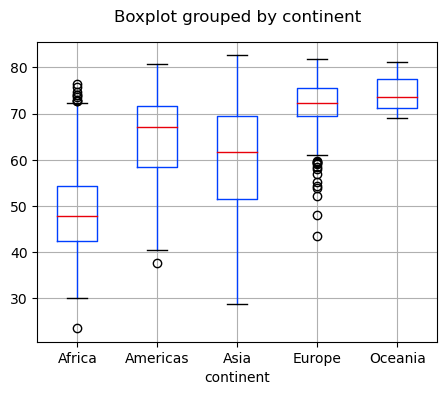

In [18]:
# For each continent
df.boxplot(column=['lifeExp'], 
            by = 'continent', 
            figsize = (5, 4)
           )

plt.title("");

Note the circles, which refer to outliers in the data.

## Using Seaborn

Seaborn is a a library built on top of `matplotlib`. It integrates closely with Pandas data structures. It has three basic level graphing methods: `relplot()`, `distplot()` and `catplot()`, which each has a number of submethods which are basically shorthands for the main methods.

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">

Let's begin with another histogram that counts the amount of times something appears in each one column (the x axis). Seaborn allows allows us to create a more fancy graph. Here, we use an argument to color the data by season (`hue="continent"`), and layer the different seasons on top of each other (`multiple="layer"`).

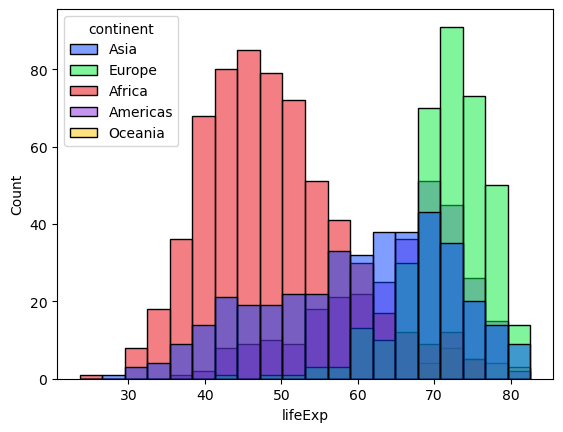

In [21]:
import seaborn as sns 

sns.histplot(              
    data=df,         
    x='lifeExp',
    hue='continent', 
    multiple='layer',
    bins=20
);

## 🥊 Challenge: `relplot`

Let's make a similar scatterplot to the one we made above, this time using Seaborn. 

1) Have a look at the [documentation](https://seaborn.pydata.org/generated/seaborn.relplot.html) to see how `relplot` works.
2) Call `relplot`: it takes x and y strings for arguments, as well as a `kind` argument which should either be "scatter" or "line".
3) Use life expectancy for X, and gdp per capita for Y. Use "scatter" for `kind`, and apply colors according to continent using the `hue` argument.

💡 **Tip**: Have a look at the plots we created above to check the syntax.

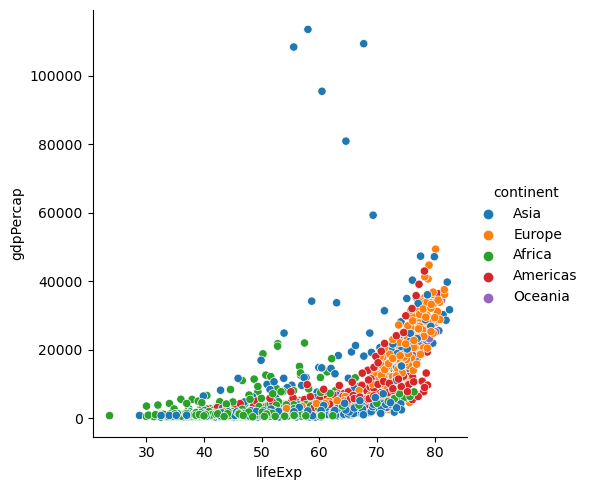

In [59]:
# YOUR CODE HERE
sns.relplot(
    data=df,
    kind='scatter',
    x='lifeExp',
    y='gdpPercap',
    hue='continent'
);

Seaborn is a a library built on top of matplotlib and integrates closely with pandas data structures. It has three basic level graphing methods: `relplot()`, `distplot()` and `catplot()`, which each has a number of submethods which are basically shorthands for the main methods.

<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png">


In [5]:
import seaborn as sns

Let's begin with a histogram that counts the amount of times something appears in each one column (the x axis). Let's also colour by season (hue=), and layer the different seasons on top of each other by setting `multiple="layer"`.

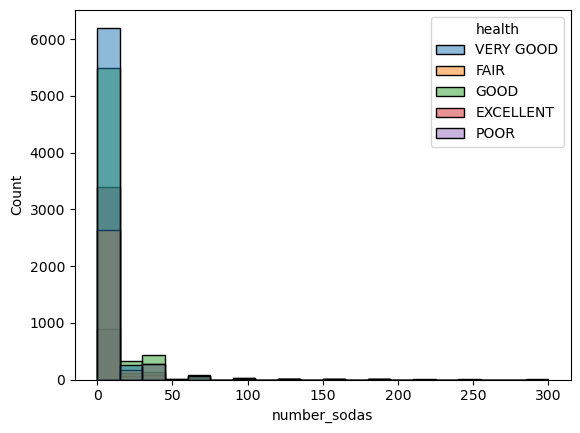

In [11]:
sns.histplot(              
    data=gap,         
    x='lifeExp',
    hue='continent', 
    multiple='layer',
    bins=20
);

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram.

In [ ]:
sns.kdeplot(data=gap, x='lifeExp', hue='year');

Let's make the same scatterplot we did above using seaborn. We use a `relplot`, which takes x and y strings for arguments, as well as a kind argument which should either be "scatter" or "line".
We take into account two dimentions - the life expectancy and gdp per capita - while applying colours according to continent.

In [ ]:
sns.relplot (
    data=gap,
    kind='scatter',
    x='lifeExp',
    y='gdpPercap',
    hue='continent'
);

Finally, if we want scatterplots for all continents separately, we can do that using [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html).

In [ ]:
scatterplot_facet = sns.FacetGrid(gap, col = 'continent', 
                                  col_wrap = 3, height = 4, sharex = False)
scatterplot_facet.map(plt.scatter, 'lifeExp', 'gdpPercap', marker = '.');